# An algorithm to predict the flight price of different airlines in a business with maximuim efficiency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('flight_dataset.csv')
data

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [3]:
# To Check if there are any missing values
data.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

# Removing uneccessary columns

In [4]:
data[['Price','Dep_hours']].corr()
# We will remove Departure hours, Departure minutes, Arrival hours and Arrival Minutes data because they don't affect the Price of flight
data.drop(['Dep_hours','Dep_min','Arrival_hours','Arrival_min'], axis=1, inplace = True)

In [5]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45


In [6]:
data.shape    # Our data set has 10683 rows and 10 columns

(10683, 10)

In [7]:
data['Year'].value_counts()

Year
2019    10683
Name: count, dtype: int64

In [8]:
# We will remove 'Year' column because all the rows in the data were all 2019
data.drop(['Year'], axis = 1, inplace = True)

# Exploratory Data Analysis

In [9]:
data['Airline'].value_counts(ascending = False)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

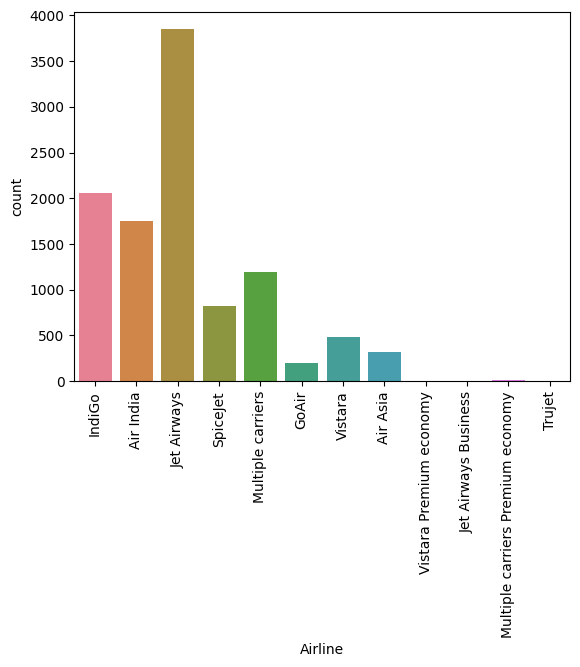

In [10]:
sns.countplot(x = 'Airline', hue = 'Airline', data = data)
plt.xticks(rotation = 90)
plt.show()

In [11]:
# Group by 'Airline' and sum up 'Price'
sum1 = data.groupby('Airline', as_index=False)['Price'].sum()
sum1 = sum1.sort_values(by ='Price', ascending = False)
#sum_d = pd.DataFrame(sum1)
counts = data['Airline'].value_counts(ascending = False).reset_index()
compare = pd.merge(sum1, counts, on='Airline', how='inner')
compare

,Airline,Price,count
0,Jet Airways,44817461,3849
1,Air India,16838841,1752
2,Multiple carriers,13039603,1196
3,IndiGo,11648071,2053
4,Vistara,3734451,479
5,SpiceJet,3548717,818
6,Air Asia,1783293,319
7,GoAir,1137045,194
8,Jet Airways Business,350152,6
9,Multiple carriers Premium economy,148445,13


- ## 'Jet Airways' was the most used airline(3849) and it still had the highset total price 
- ## Indigo that was the second most used Airline(2053) did not have the second highest total price
- ## Rather it was 'Air India' which was the third most used 'Air line with a very low value(1752) compared to 'IndiGo'

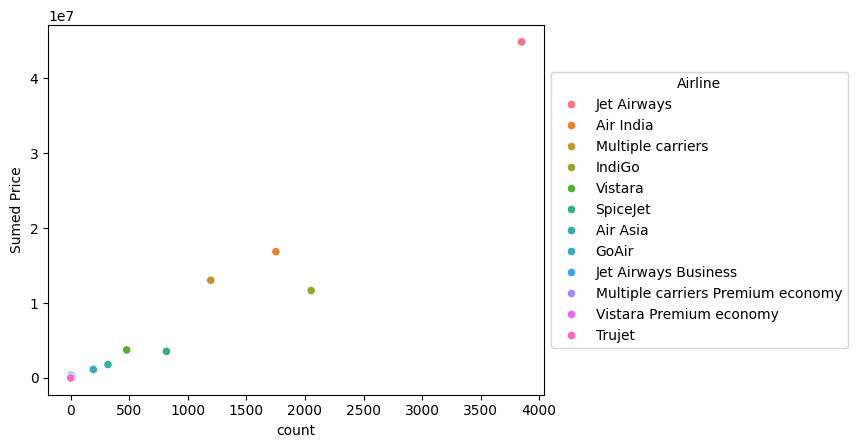

In [12]:
sns.scatterplot(x= 'count', y= 'Price', hue = 'Airline', data = compare)
plt.legend(title='Airline', loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Sumed Price')
plt.show()
# The Prices in the chart are raised to power of 7

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

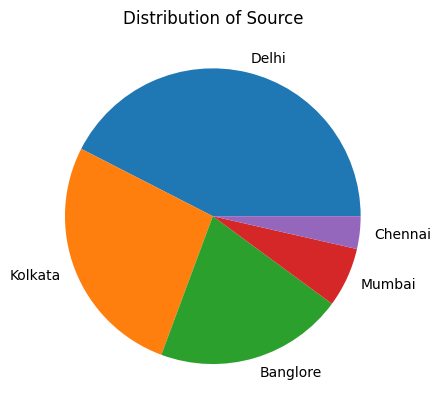

In [13]:
print(data['Source'].value_counts())
labelling = ['Delhi','Kolkata','Banglore','Mumbai','Chennai']
plt.pie(data['Source'].value_counts(), labels=labelling)
plt.title('Distribution of Source')
plt.show


Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

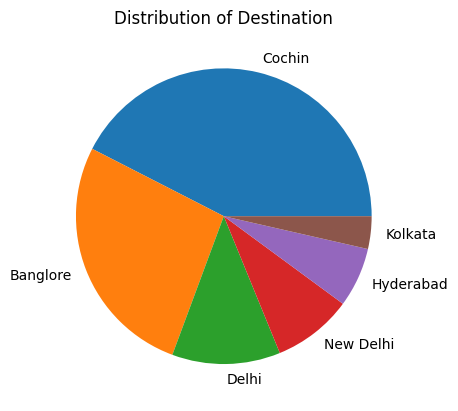

In [14]:
print(data['Destination'].value_counts())
labelling = ['Cochin','Banglore','Delhi','New Delhi','Hyderabad','Kolkata']
plt.pie(data['Destination'].value_counts(), labels=labelling)
plt.title('Distribution of Destination')
plt.show

<Axes: >

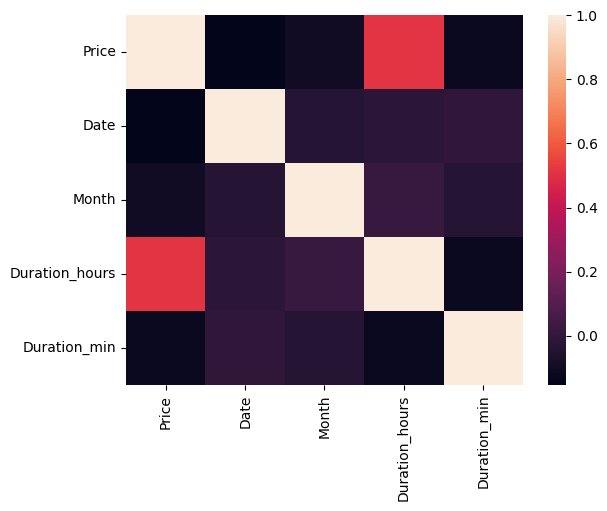

In [15]:
relate = data[['Price', 'Date', 'Month','Duration_hours', 'Duration_min']].corr()
sns.heatmap(relate)

## From the heat map above, we can see that the only column that have some level of correlation with 'Price' is 'Duration_hours'

In [16]:
# We will remove the other columns that have no correlation with 'prices'
data.drop(['Date','Month','Duration_min'],axis = 1, inplace = True)

In [17]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours
0,IndiGo,Banglore,New Delhi,0,3897,2
1,Air India,Kolkata,Banglore,2,7662,7
2,Jet Airways,Delhi,Cochin,2,13882,19
3,IndiGo,Kolkata,Banglore,1,6218,5
4,IndiGo,Banglore,New Delhi,1,13302,4


# Transforming columns with categorical variables to numerical variables

In [18]:
# List columns with categorical/object variables
categorical_column = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_column

['Airline', 'Source', 'Destination']

In [19]:
# Since we will be testing with new data, we will use LabelEncoder()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.select_dtypes(include = ['object', 'category']).columns:
    data[col] = label_encoder.fit_transform(data[col])

data

,Airline,Source,Destination,Total_Stops,Price,Duration_hours
0,3,0,5,0,3897,2
1,1,3,0,2,7662,7
2,4,2,1,2,13882,19
3,3,3,0,1,6218,5
4,3,0,5,1,13302,4
...,...,...,...,...,...,...
10678,0,3,0,0,4107,2
10679,1,3,0,0,4145,2
10680,4,0,2,0,7229,3
10681,10,0,5,0,12648,2


In [20]:
a =data['Airline'].value_counts()
s =data['Source'].value_counts()
d = data['Destination'].value_counts()
print(a,s,d)

Airline
4     3849
3     2053
1     1752
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: count, dtype: int64 Source
2    4537
3    2871
0    2197
4     697
1     381
Name: count, dtype: int64 Destination
1    4537
0    2871
2    1265
5     932
3     697
4     381
Name: count, dtype: int64


# Performing Linear Regression to predict the prices of flight

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [22]:
# Defining our independent (x) and dependent variables (y)
x = data.iloc[:,[0,1,2,3,5]].values
y =  data['Price'].values

## Splitting data into training and testing sets

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [24]:
# Creating the Linear Regression Model
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(x_test)
y_pred

array([ 9490.88019266,  5391.6811494 , 12626.15546188, ...,
        7387.54335732,  9235.21932337, 13709.27113605])

In [26]:
# Checking the accuracy
metrics.r2_score(y_test,y_pred)

0.401172187994809

In [27]:
# To calculate the error difference of the testing data and predicted data
mean_absolute_error(y_test, y_pred)

2525.138025538996

# Model Improvement: Using **XGBRegressor model**

## Add Interaction Features or Polynomial Features: used with linear regression to model non-linear data.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_poly = poly.fit_transform(x)

# Split the dataset with new polynomial features
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn import metrics

scaler = StandardScaler()
x = scaler.fit_transform(x)


# Define the hyper parameter grid
param_grid = {
    'max_depth': [3, 6, 10],                           # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],                # Step size shrinkage 
    'n_estimators': [100, 500, 1000],                  # Number of boosting rounds
}

# Instantiate the model
model2 = XGBRegressor()

# Use GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)   
grid_search.fit(x_train, y_train)

# Get best hyperparameters / score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.6091741323471069


In [30]:
y_pred

array([12147.355 ,  8041.7905, 11978.872 , ...,  7732.3267,  4645.1826,
       12147.355 ], dtype=float32)

In [31]:
# To check accuracy
metrics.r2_score(y_test,y_pred)

0.6285912990570068

In [32]:
# To calculate the error difference of the testing data and predicted data
mean_absolute_error(y_test, y_pred)

1880.1178190439284

# **XGBRegressor model is more accurate**

## The Price of flight of any Airline to different destinations  can be predicted

### Example using random data

In [41]:
sample = [[1,4,3,2,15]]                   # As 2D array
sample = poly.fit_transform(sample)        # Adding interactive features to establish linear relation
prediction = best_model.predict(sample)     # Carrying out XGBRegression
print(f'Price of Flight is {prediction}$')

Price of Flight is [15211.194]$


# Bonus: To predict the 'Price of flight, we need the Duration of flight ... so we will Build a model that Predicts the 'Duration Hours' with the same dataset.

## Predicting the Duration hours using LinearRegression

In [33]:
data.drop(['Price'], axis = 1, inplace = True)

In [34]:
data.head()

,Airline,Source,Destination,Total_Stops,Duration_hours
0,3,0,5,0,2
1,1,3,0,2,7
2,4,2,1,2,19
3,3,3,0,1,5
4,3,0,5,1,4


In [35]:
# Defining our independent (x) and dependent variables (y)
x = data.iloc[:,[0,1,2,3]]
y =  data.iloc[:,4]

## Splitting data into training and testing sets

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_poly = poly.fit_transform(x)

# Split the dataset with new polynomial features
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [37]:
# Creating the Linear Regression Model
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = linear.predict(x_test)
y_pred

array([13.12962867, 11.45388227, 13.12962867, ..., 11.5422027 ,
        2.30444716, 13.12962867])

In [39]:
# Checking the accuracy
metrics.r2_score(y_test,y_pred)

0.5740672105334599

In [40]:
# To calculate the error difference of the testing data and predicted data
mean_absolute_error(y_test, y_pred)

3.889337722334253

## The Duration of flight of any Airline to different destinations can be predicted

## Example using random data

In [45]:
sample = [[4,4,2,1]]                   # As 2D array
sample = poly.fit_transform(sample)        # Adding interactive features to establish linear relation
prediction = linear.predict(sample)     # Carrying out XGBRegression
print(f'Duration of Flight is {prediction}hours')

Duration of Flight is [12.53935527]hours
